In [ ]:
!git clone https://github.com/PatristicTextArchive/analyse_data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Analyse the corpus

## Load data from file

In [2]:
df = pd.read_csv('/content/analyse_data/data/severian_plaintext_lemmatized.csv')

## Filter the Dataframe for only greek texts

In [3]:
filtered_df = df[df['lang'] == 'grc']

# Display the filtered DataFrame
filtered_df.reset_index(drop=True)

,urn,lang,text,lemmatized_text
0,pta0001.pta001.pta-grc1,grc,Λόγος πάνυ ὠφέλιμος περὶ πίστεως καὶ εἰς τὸν π...,Λόγος πάνυ ὠφέλιμος πίστις φύσις νόμος ἅγιος π...
1,pta0001.pta002.pta-grc1,grc,"Λόγος περὶ μετανοίας καὶ κατανύξεως, καὶ ὅτι τ...","Λόγος μετάνοια κατάνυξις , ταχύς θεός σωτηρία ..."
2,pta0001.pta003.pta-grc1,grc,Τοῦ ἑν ἁγίοις πατρὸς ἡμῶν Ἰωάννου ἀρχιεπισκόπο...,ἑν ἅγιος πατήρ Ἰωάννης ἀρχιεπισκόπου Κωνσταντι...
3,pta0001.pta004.pta-grc1,grc,Χρυσοστόμου ὁμιλία περὶ τοῦ ἁγίου πνεύματος Χθ...,"Χρυσοστόμος ὁμιλία ἅγιος πνεῦμα Χθὲςς , φιλόχρ..."
4,pta0001.pta005.pta-grc1,grc,"Εἰς μνήμην μαρτύρων, καὶ ὅτι ποιμὴν καὶ πρόβατ...","μνήμη μάρτυς , ποιμήν πρόβατον Χριστός ὀνομάζω..."
...,...,...,...,...
60,pta0001.pta059.pta-grc1,grc,Τοῦ αὐτοῦ εἰς τὴν τρίτην ἡμέραν τῆς κοσμοποιία...,"τρίτος ἡμέρα κοσμοποιία , ἀνάστασις . κόσμος τ..."
61,pta0001.pta060.pta-grc1,grc,Τοῦ αὐτοῦ εἰς τὴν τετάρτην ἡμέραν τῆς κοσμοποι...,τέταρτος ἡμέρα κοσμοποιία . Κάμνουσα φωνή προτ...
62,pta0001.pta061.pta-grc1,grc,Τοῦ αὐτοῦ εἰς τὴν πέμπτην ἡμέραν τῆς κοσμοποιΐ...,πέμπτος ἡμέρα κοσμοποιΐα . πολύς μέγας φιλάνθρ...
63,pta0001.pta062.pta-grc1,grc,Εἰς τὴν ἕκτην ἡμέραν τῆς κοσμοποιΐας καὶ εἰς τ...,ἕκτος ἡμέρα κοσμοποιΐα πρωτοπλάστος ὄφις ξύλον...


## Term Frequency-Inverse Document Frequency (TF-IDF)

In [4]:
text_titles = filtered_df["urn"]
# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the text data
vectors = vectorizer.fit_transform(filtered_df['lemmatized_text'])
tfidf_df = pd.DataFrame(vectors.toarray(), index=text_titles, columns=vectorizer.get_feature_names_out())

In [5]:
tfidf_df

,kαρμήλου,kἂν,oἱ,oἶκος,oὐ,ʽἁγιωσύνη,αβγ,αβελ,αδὰμ,ακοτέχνως,...,ῥᾴδιος,ῥᾴθυμος,ῥᾷθυμία,ῥῆμα,ῥῆσις,ῥῖνες,ῥῖψις,ῥῦμαι,ῥῶς,ῥῶσις
urn,,,,,,,,,,,,,,,,,,,,,
pta0001.pta001.pta-grc1,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.012119,0.00000,0.0,0.000000,0.0,0.0,0.0
pta0001.pta002.pta-grc1,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.024379,0.00000,0.0,0.000000,0.0,0.0,0.0
pta0001.pta003.pta-grc1,0.0,0.000000,0.008728,0.0,0.009593,0.000000,0.0,0.0,0.0,0.0,...,0.007638,0.0,0.0,0.015608,0.00000,0.0,0.000000,0.0,0.0,0.0
pta0001.pta004.pta-grc1,0.0,0.000000,0.000000,0.0,0.000000,0.064597,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.006569,0.00000,0.0,0.000000,0.0,0.0,0.0
pta0001.pta005.pta-grc1,0.0,0.022682,0.020637,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.012302,0.00000,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pta0001.pta059.pta-grc1,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.009221,0.00000,0.0,0.000000,0.0,0.0,0.0
pta0001.pta060.pta-grc1,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.030765,0.00000,0.0,0.000000,0.0,0.0,0.0
pta0001.pta061.pta-grc1,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.028107,0.00000,0.0,0.000000,0.0,0.0,0.0


In [6]:
# "turn" table and rename columns
new = tfidf_df.stack().reset_index()
new = new.rename(columns={0:'tfidf', 'level_1': 'term'})


In [9]:
# sort table by urn and tfidf and group by urn (first 10 entries)
new.sort_values(by=['urn','tfidf'], ascending=[True,False]).groupby(['urn']).head(10)

,urn,term,tfidf
2653,pta0001.pta001.pta-grc1,θεός,0.273319
15775,pta0001.pta001.pta-grc1,ἔργον,0.260561
4078,pta0001.pta001.pta-grc1,λέγω,0.208716
7723,pta0001.pta001.pta-grc1,πᾶς,0.198778
3007,pta0001.pta001.pta-grc1,κατάκαρπος,0.178761
...,...,...,...
1129701,pta0001.pta072.pta-grc1,φημί,0.158140
1130735,pta0001.pta072.pta-grc1,ἀλλά,0.158140
1126843,pta0001.pta072.pta-grc1,πνεῦμα,0.156975
1125620,pta0001.pta072.pta-grc1,οὗτος,0.138088


In [10]:
# write to new df
top_tfidf = new.sort_values(by=['urn','tfidf'], ascending=[True,False]).groupby(['urn']).head(10)

### Visualizations

#### per text

In [11]:
# Visualize
import altair as alt
import numpy as np
# Code by https://github.com/emonson from https://melaniewalsh.github.io/Intro-Cultural-Analytics/05-Text-Analysis/03-TF-IDF-Scikit-Learn.html
# Terms in this list will get a red dot in the visualization
term_list = ['θεός', 'Χριστός', 'πνεῦμα']

# adding a little randomness to break ties in term ranking
top_tfidf_plusRand = top_tfidf.copy()
top_tfidf_plusRand['tfidf'] = top_tfidf_plusRand['tfidf'] + np.random.rand(top_tfidf.shape[0])*0.0001

# base for all visualizations, with rank calculation
base = alt.Chart(top_tfidf_plusRand).encode(
    x = 'rank:O',
    y = 'urn:N'
).transform_window(
    rank = "rank()",
    sort = [alt.SortField("tfidf", order="descending")],
    groupby = ["urn"],
)

# heatmap specification
heatmap = base.mark_rect().encode(
    color = 'tfidf:Q'
)

# red circle over terms in above list
circle = base.mark_circle(size=100).encode(
    color = alt.condition(
        alt.FieldOneOfPredicate(field='term', oneOf=term_list),
        alt.value('red'),
        alt.value('#FFFFFF00')        
    )
)

# text labels, white for darker heatmap colors
text = base.mark_text(baseline='middle').encode(
    text = 'term:N',
    color = alt.condition(alt.datum.tfidf >= 0.23, alt.value('white'), alt.value('black'))
)

# display the three superimposed visualizations
(heatmap + circle + text).properties(width = 600)


alt.LayerChart(...)

#### whole corpus

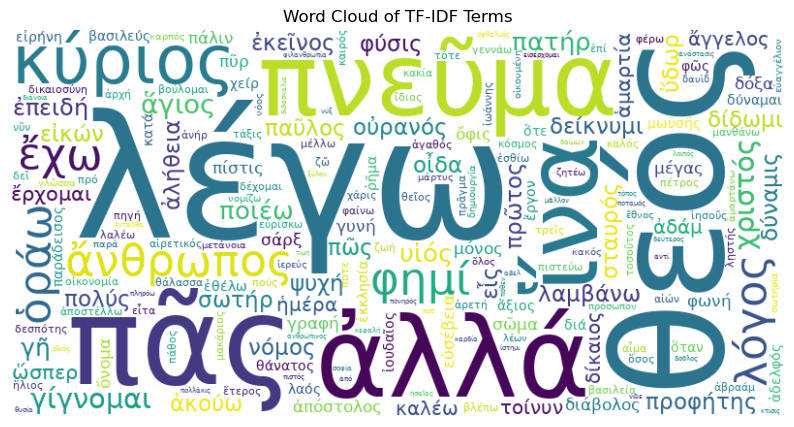

In [13]:
from wordcloud import WordCloud

# Sum the TF-IDF scores for each term
tfidf_sum = tfidf_df.sum(axis=0)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='data/DejaVuSans.ttf').generate_from_frequencies(tfidf_sum)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud of TF-IDF Terms')
plt.show()

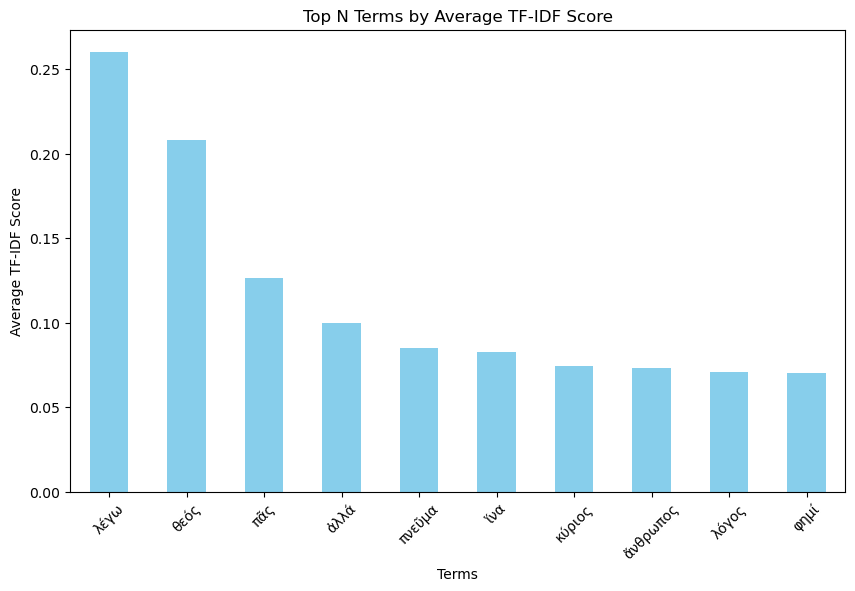

In [14]:
# Calculate the mean TF-IDF score for each term
mean_tfidf = tfidf_df.mean(axis=0).sort_values(ascending=False)

# Select top N terms
top_n = 10
top_terms = mean_tfidf.head(top_n)

# Create a bar plot
plt.figure(figsize=(10, 6))
top_terms.plot(kind='bar', color='skyblue')
plt.title('Top N Terms by Average TF-IDF Score')
plt.xlabel('Terms')
plt.ylabel('Average TF-IDF Score')
plt.xticks(rotation=45)
plt.show()